# Mô hình

In [7]:
import os
import json
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
import matplotlib.pyplot as plt
import random

# Đường dẫn model
model_path = "/kaggle/input/caption_blip_model_final/tensorflow2/default/1"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Kiểm tra preprocessor_config của model
preprocessor_config = os.path.join(model_path, "preprocessor_config.json")

if os.path.exists(preprocessor_config):
    print("Có preprocessor_config.json, load processor từ model_path.")
    processor = BlipProcessor.from_pretrained(model_path, local_files_only=True)
else:
    print("Không có preprocessor_config.json, fallback về Salesforce/blip-image-captioning-base.")
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")

# Load model 
model = BlipForConditionalGeneration.from_pretrained(model_path, local_files_only=True).to(device)
# model.eval()


Có preprocessor_config.json, load processor từ model_path.


# Tích hợp code đánh giá mô hình

In [2]:
from sentence_transformers import SentenceTransformer, util

s1 = "Tôi thích ăn phở."
s2 = "Tôi yêu món phở."

def eval_caption(sentence1, sentence2):
    model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')
    embeddings = model.encode([sentence1, sentence2], convert_to_tensor=True)
    similarity = util.pytorch_cos_sim(embeddings[0], embeddings[1])
    print(f"Similarity: {similarity.item():.4f}")

eval_caption(s1, s2)

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Similarity: 0.5653


# Kết quả

In [ ]:
from sentence_transformers import SentenceTransformer
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
from PIL import Image
import matplotlib.pyplot as plt
from sentence_transformers import util

sentence_model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

def predict_and_compare_cross(model, processor, image_path, ground_truth_caption, device="cuda"):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt").to(device)
    # Dự đoán caption
    model.eval()
    with torch.no_grad():
        output = model.generate(**inputs, max_length=32)
    predicted_caption = processor.decode(output[0], skip_special_tokens=True)
    embeddings = sentence_model.encode([ground_truth_caption, predicted_caption], convert_to_tensor=True)
    similarity = util.pytorch_cos_sim(embeddings[0], embeddings[1])    
    # Hiển thị ảnh
    plt.imshow(image)
    plt.axis("off")
    plt.show()

    print(f"Ground truth caption: {ground_truth_caption}")
    print(f"Predicted caption: {predicted_caption}")
    print(f"Similarity: {similarity.item():.4f}")

    return predicted_caption


img_path = "/kaggle/input/601-dataset-deep/601/000000000885.jpg"
gt01 = "a male tennis player in white shorts is playing tennis"
pred = predict_and_compare_cross(model, processor, img_path, gt01)



Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

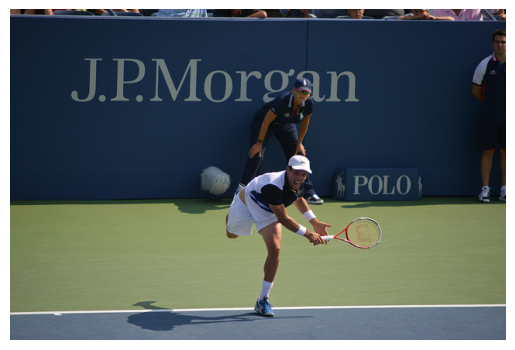

Ground truth caption: a male tennis player in white shorts is playing tennis
Predicted caption: a man standing on a tennis court holding a racquet.
Similarity: 0.8077
Dự đoán với câu thực tế: 
Câu thực tế 1


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Similarity: 0.8077

Câu thực tế  2


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Similarity: 0.5488

Câu thực tế  3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Similarity: 0.9317

Câu thực tế  4


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Similarity: 0.8108

Câu thực tế  5


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Similarity: 0.7834


In [5]:
gt01 = "a male tennis player in white shorts is playing tennis"
gt02 = "This woman has just returned a volley in tennis."
gt03 = "A man holding a tennis racket playing tennis."
gt04 = "The man balances on one leg after serving a tennis ball."
gt05 = "Someone playing in a tennis tournament with a crowd looking on."
pred = predict_and_compare_cross(model, processor, img_path, gt01)
predict_cap = pred
print("Dự đoán với câu thực tế: ")
print("Câu thực tế 1")
eval_caption(predict_cap,gt01)
print("\n=======================================")
print("Câu thực tế  2")
eval_caption(predict_cap,gt02)
print("\n=======================================")
print("Câu thực tế  3")
eval_caption(predict_cap,gt03)
print("\n=======================================")
print("Câu thực tế  4")
eval_caption(predict_cap,gt04)
print("\n=======================================")
print("Câu thực tế  5")
eval_caption(predict_cap,gt05)

In [6]:
# Câu tốt nhất
print("Câu tốt nhất câu thực tế  3")
eval_caption(predict_cap,gt03)

Câu tốt nhất câu thực tế  3


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Similarity: 0.9317


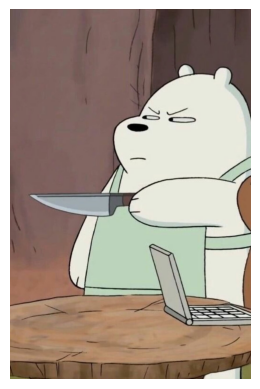

Predicted caption: a cartoon character sitting at a table with a laptop.


'a cartoon character sitting at a table with a laptop.'

In [9]:
# Sử dụng model với hình ảnh 
# VD: img_path = "đường dẫn hình ảnh"
img_path = "/kaggle/input/bearwithknife/bear.jpg"
processor = BlipProcessor.from_pretrained(model_path, local_files_only=True)
model = BlipForConditionalGeneration.from_pretrained(model_path, local_files_only=True).to(device)

def predict_caption(model, processor, image_path, device="cuda"):
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, return_tensors="pt").to(device)

    # Dự đoán caption
    model.eval()
    with torch.no_grad():
        output = model.generate(**inputs, max_length=32)
    predicted_caption = processor.decode(output[0], skip_special_tokens=True)

    # Hiển thị ảnh
    plt.imshow(image)
    plt.axis("off")
    plt.show()

    print(f"Predicted caption: {predicted_caption}")
    return predicted_caption

predict_caption(model,processor,img_path)